## Install libraries 

In [24]:
!pip install numpy==1.22.4

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl.metadata (2.1 kB)
Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.3.0 requires numpy>=1.23, but you have numpy 1.22.4 which is incompatible.
fastparquet 2024.11.0 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.


In [25]:
!pip install pandas==1.3.5

In [26]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
#print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json

In [28]:
!pip show tensorflow

Name: tensorflow
Version: 2.10.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\matth\anaconda3\envs\tf\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [29]:
!pip install tslearn plotly

In [30]:
!pip install tqdm

In [31]:
# mode = "debugging"
mode = "training"
# mode = "submission"

## Understanding the data

In [32]:
# /kaggle/input/asl-signs/train.csv -> asl-signs/train.csv
df_train = pd.read_csv("asl-signs/train.csv")
print(df_train.shape)
df_train.head(10)

(94477, 4)


,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie
5,train_landmark_files/26734/1000241583.parquet,26734,1000241583,duck
6,train_landmark_files/26734/1000255522.parquet,26734,1000255522,minemy
7,train_landmark_files/32319/1000278229.parquet,32319,1000278229,lips
8,train_landmark_files/37055/100035691.parquet,37055,100035691,flower
9,train_landmark_files/29302/100039661.parquet,29302,100039661,time


In [33]:
json_file_path = "asl-signs/sign_to_prediction_index_map.json"
with open(json_file_path, 'r') as j:
     sign_dict = json.loads(j.read())
        
ordered_signs = list(sign_dict.keys())
print(ordered_signs)


['TV', 'after', 'airplane', 'all', 'alligator', 'animal', 'another', 'any', 'apple', 'arm', 'aunt', 'awake', 'backyard', 'bad', 'balloon', 'bath', 'because', 'bed', 'bedroom', 'bee', 'before', 'beside', 'better', 'bird', 'black', 'blow', 'blue', 'boat', 'book', 'boy', 'brother', 'brown', 'bug', 'bye', 'callonphone', 'can', 'car', 'carrot', 'cat', 'cereal', 'chair', 'cheek', 'child', 'chin', 'chocolate', 'clean', 'close', 'closet', 'cloud', 'clown', 'cow', 'cowboy', 'cry', 'cut', 'cute', 'dad', 'dance', 'dirty', 'dog', 'doll', 'donkey', 'down', 'drawer', 'drink', 'drop', 'dry', 'dryer', 'duck', 'ear', 'elephant', 'empty', 'every', 'eye', 'face', 'fall', 'farm', 'fast', 'feet', 'find', 'fine', 'finger', 'finish', 'fireman', 'first', 'fish', 'flag', 'flower', 'food', 'for', 'frenchfries', 'frog', 'garbage', 'gift', 'giraffe', 'girl', 'give', 'glasswindow', 'go', 'goose', 'grandma', 'grandpa', 'grass', 'green', 'gum', 'hair', 'happy', 'hat', 'hate', 'have', 'haveto', 'head', 'hear', 'helic

In [34]:
ROWS_PER_FRAME = 543  # number of landmarks per frame

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns).fillna(0)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)

def load_relevant_data(pq_path):
    data = pd.read_parquet(pq_path).fillna(0)
    return data


In [35]:
#!pip install pyarrow

In [36]:
idx_plot = 3
path_show = "asl-signs/"+df_train['path'].values[idx_plot]
sign_plot = df_train['sign'].values[idx_plot]
path_example = path_show.replace("_", "_")

df = load_relevant_data(path_show)
df.head(10)

,frame,row_id,type,landmark_index,x,y,z
0,17,17-face-0,face,0,0.495870,0.478694,-0.037412
1,17,17-face-1,face,1,0.492222,0.447209,-0.067939
2,17,17-face-2,face,2,0.492067,0.457237,-0.035722
3,17,17-face-3,face,3,0.480419,0.415996,-0.050779
4,17,17-face-4,face,4,0.492035,0.437453,-0.072314
5,17,17-face-5,face,5,0.491820,0.424721,-0.067133
6,17,17-face-6,face,6,0.491240,0.394258,-0.032263
7,17,17-face-7,face,7,0.398341,0.395734,0.017706
8,17,17-face-8,face,8,0.490602,0.367059,-0.023201
9,17,17-face-9,face,9,0.490210,0.353400,-0.025720


In [37]:
path_show = "asl-signs/"+df_train['path'].values[1]
sign_show = df_train['sign'].values[1]

df_example = load_relevant_data_subset(path_show)

frames = df_example.shape[0]
keypoints = df_example.shape[1]
position = df_example.shape[2]

print("\nNumber of frames:", frames)
print("Keypoints:", keypoints)
print("X, Y Z postions:", position)
print("Total number of datapoints in this sequence:", np.prod(df_example.shape))


pose_landmarks = 33
face_landmarks = 468
right_hand_landmarks = 21
start_left_hand = face_landmarks
left_hand_landmarks = 21
start_right_hand = face_landmarks + left_hand_landmarks + pose_landmarks
total_landmarks = pose_landmarks + face_landmarks + right_hand_landmarks + left_hand_landmarks


print("\nPose landmarks:", pose_landmarks)
print("Face landmarks:", face_landmarks)
print("Right hand landmarks:", right_hand_landmarks)
print("Left hand landmarks:", left_hand_landmarks)
print("Total landmarks/keypoints: ", total_landmarks)


Number of frames: 11
Keypoints: 543
X, Y Z postions: 3
Total number of datapoints in this sequence: 17919

Pose landmarks: 33
Face landmarks: 468
Right hand landmarks: 21
Left hand landmarks: 21
Total landmarks/keypoints:  543


In [38]:
from tqdm import tqdm

max_sequence_length = 32
lip_marks = [61, 185, 40, 39, 37, 0, 267, 269, 270, 409, 291, 78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 95, 88, 178, 87, 14, 317, 402, 318, 324, 146, 91, 181, 84, 17, 314, 405, 321, 375]  

lips = lip_marks
left_hand = [*range(start_left_hand, start_left_hand+left_hand_landmarks, 1)]
right_hand = [*range(start_right_hand, start_right_hand+right_hand_landmarks, 1)]
meaningful_keypoints = lips + left_hand + right_hand
input_length = len(meaningful_keypoints)*3

def get_data(file_paths, y_sign):
    
    X = np.empty((file_paths.shape[0], max_sequence_length, len(meaningful_keypoints)*3), dtype=float)

    for i in tqdm(range(file_paths.shape[0])):
        file_name = "asl-signs/"+file_paths[i]
        data = load_relevant_data_subset(file_name)
        
        data = data[:, meaningful_keypoints]
        
        if data.shape[0] < max_sequence_length:
            rows = max_sequence_length - data.shape[0]
            data = np.append(np.zeros((rows, len(meaningful_keypoints), 3)), data, axis=0)
        elif data.shape[0] > max_sequence_length:
            data = data[-(max_sequence_length):]

        X[i] = data.reshape(max_sequence_length, len(meaningful_keypoints)*3, order='F')
        
        del data
        
    X = np.asarray(X).astype(np.float32)
        
    y = []
    for sign in y_sign:
        y.append(sign_dict[sign])

    y = np.array(y, dtype=int)

    return X, y

# Training the classifier

## LSTM

In [39]:
!pip install matplotlib==3.8.0

  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastparquet 2024.11.0 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.


In [40]:
import sys
print(sys.version)

3.9.20 (main, Oct  3 2024, 07:38:01) [MSC v.1929 64 bit (AMD64)]


In [41]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Input, optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import pad_sequences

In [42]:
# a single dense block followed by a normalization block and relu activation
def dense_block(units):
    fc = layers.Dense(units)
    norm = layers.LayerNormalization()
    act = layers.Activation("relu")
    drop = layers.Dropout(0.1)
    return lambda x: drop(act(norm(fc(x))))

# the final dense block for the classification
def classifier_lstm(units):
    lstm = layers.LSTM(units)
    out = layers.Dense(250, activation="softmax", name="outputs")
    return lambda x: out(lstm(x))


In [43]:
inputs = tf.keras.Input(shape=(None, input_length))

embedding_units = [256]#, 128, 256] # tune this
# # dense encoder model
x = inputs
for n in embedding_units:
    x = dense_block(n)(x)
out = classifier_lstm(embedding_units[-1])(x)

model = tf.keras.Model(inputs=inputs, outputs=out)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, 246)]       0         
                                                                 
 dense_1 (Dense)             (None, None, 256)         63232     
                                                                 
 layer_normalization_1 (Laye  (None, None, 256)        512       
 rNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, None, 256)         0         
                                                                 
 dropout_1 (Dropout)         (None, None, 256)         0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                           

In [44]:
# add a decreasing learning rate scheduler to help convergence
batch_size = 128
validation_percentage = 0.05
steps_per_epoch = int(94477*(1-validation_percentage)) // batch_size #701
boundaries = [steps_per_epoch * n for n in [25, 35, 45, 55]] #23, 53, 60
print(boundaries) #[16123, 24535, 31545, 37153, 42060]
values = [1e-3,1e-4,1e-5,1e-6,1e-7] #,1e-8
lr_sched = optimizers.schedules.PiecewiseConstantDecay(boundaries, values)

optimizer = optimizers.Adam(lr_sched)
# optimizer = optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(name="loss"),
              metrics=["accuracy","sparse_top_k_categorical_accuracy"])

[17525, 24535, 31545, 38555]


In [45]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [46]:
mode = "training"
if mode == "training":
    file_paths = df_train['path'].values#[:1000]
    y_sign = df_train['sign'].values#[:1000]
    X, y = get_data(file_paths, y_sign)

    X, X_val, y, y_val = train_test_split(X, y, test_size=validation_percentage, random_state=123)

    print(X.shape)
    print(y.shape)

    history = model.fit(X, y, 
                    epochs=30,
                    batch_size=batch_size,
                    validation_data=(X_val, y_val),
                    verbose=2,
                    #callbacks=[get_callbacks()]
                   )

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    sparse_top_k_categorical_accuracy = history.history['sparse_top_k_categorical_accuracy']
    val_sparse_top_k_categorical_accuracy = history.history['val_sparse_top_k_categorical_accuracy']

100%|████████████████████████████████████████████████████████████████████████████| 94477/94477 [33:23<00:00, 47.15it/s]


(89753, 32, 246)
(89753,)
Epoch 1/30
702/702 - 13s - loss: 4.7453 - accuracy: 0.0562 - sparse_top_k_categorical_accuracy: 0.1793 - val_loss: 4.0482 - val_accuracy: 0.1274 - val_sparse_top_k_categorical_accuracy: 0.3427 - 13s/epoch - 18ms/step
Epoch 2/30
702/702 - 6s - loss: 3.5662 - accuracy: 0.1988 - sparse_top_k_categorical_accuracy: 0.4668 - val_loss: 3.3591 - val_accuracy: 0.2297 - val_sparse_top_k_categorical_accuracy: 0.5241 - 6s/epoch - 9ms/step
Epoch 3/30
702/702 - 7s - loss: 2.9457 - accuracy: 0.3122 - sparse_top_k_categorical_accuracy: 0.6099 - val_loss: 2.7547 - val_accuracy: 0.3597 - val_sparse_top_k_categorical_accuracy: 0.6503 - 7s/epoch - 10ms/step
Epoch 4/30
702/702 - 7s - loss: 2.5705 - accuracy: 0.3891 - sparse_top_k_categorical_accuracy: 0.6826 - val_loss: 2.5327 - val_accuracy: 0.4050 - val_sparse_top_k_categorical_accuracy: 0.6856 - 7s/epoch - 10ms/step
Epoch 5/30
702/702 - 7s - loss: 2.3223 - accuracy: 0.4437 - sparse_top_k_categorical_accuracy: 0.7260 - val_loss:

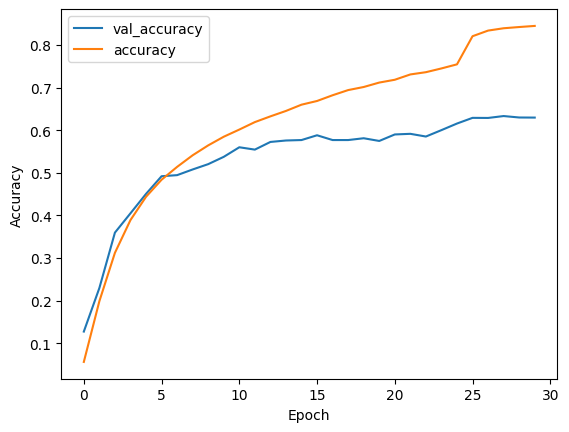

In [47]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(val_accuracy, label='val_accuracy')
plt.plot(accuracy, label='accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend()


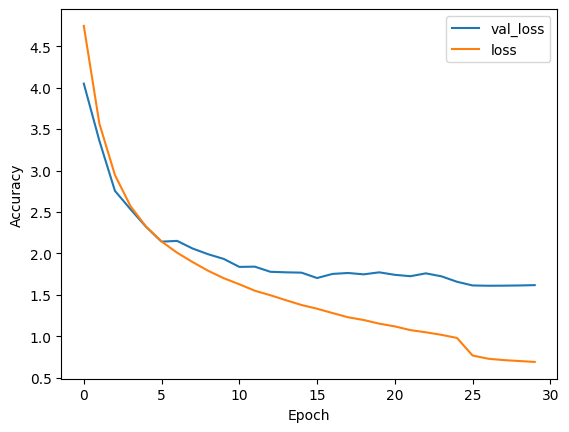

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.plot(val_loss, label='val_loss')
plt.plot(loss, label='loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend()


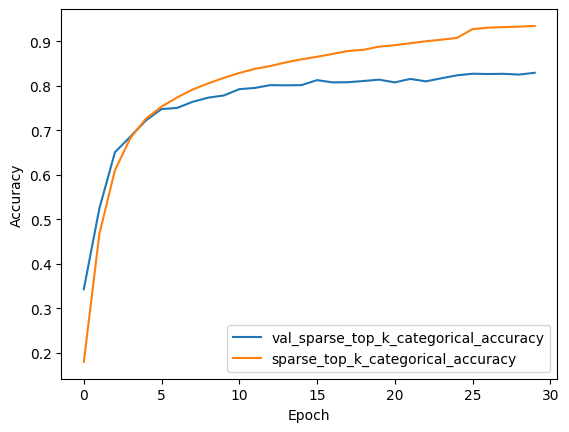

In [49]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.plot(val_sparse_top_k_categorical_accuracy, label='val_sparse_top_k_categorical_accuracy')
plt.plot(sparse_top_k_categorical_accuracy, label='sparse_top_k_categorical_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.legend()

In [52]:
from sklearn.metrics import precision_score, recall_score

# Get predictions for the validation set
y_pred_probs = model.predict(X_val)  # Predicted probabilities
y_pred = y_pred_probs.argmax(axis=1)  # Convert to predicted class indices

# Calculate precision and recall
precision = precision_score(y_val, y_pred, average='weighted')  # Weighted for multiclass
recall = recall_score(y_val, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

148/148 [==============================] - 1s 4ms/step
Precision: 0.6455
Recall: 0.6296


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Placeholder for storing metrics
precision_values = []
recall_values = []
epochs=30

for epoch in range(epochs):
    # Train your model for one epoch (adjust for your framework)
    history = model.fit(X, y, epochs=1, validation_data=(x_val, y_val), verbose=0)

    # Get predictions on validation set
    y_pred_probs = model.predict(X_val)  # Predicted probabilities
    y_pred = y_pred_probs.argmax(axis=1)  # Predicted class indices

    # Calculate precision and recall
    precision = precision_score(y_val, y_pred, average='weighted')  # Adjust `average` as needed
    recall = recall_score(y_val, y_pred, average='weighted')

    # Store the metrics
    precision_values.append(precision)
    recall_values.append(recall)

# Plot precision and recall over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), precision_values, label="Precision", marker='o')
plt.plot(range(1, epochs + 1), recall_values, label="Recall", marker='o')
plt.title("Precision and Recall Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.show()

In [53]:
#history.save('my_model.h5')
model.save('my_model.h5')

In [ ]:
#test_loss, test_acc = model.evaluate(X,  y, verbose=1)

In [32]:
if mode == "training":
    del X
    del y
    del X_val
    del y_val

# Convert final model in a tf.lite model
Add a preprocessing pipeline and save the model as tf.lite model

In [54]:
lips = lip_marks
left_hand = [*range(start_left_hand, start_left_hand+left_hand_landmarks, 1)]
right_hand = [*range(start_right_hand, start_right_hand+right_hand_landmarks, 1)]
meaningful_keypoints = lips + left_hand + right_hand


def get_inference_model(model):
    inputs = tf.keras.Input(shape=(ROWS_PER_FRAME,3), name="inputs")
    
    # drop most of the face mesh
    x = tf.gather(inputs, meaningful_keypoints, axis=1)

    # fill nan
    x = tf.where(tf.math.is_nan(x), tf.zeros_like(x), x)

    # flatten landmark xyz coordinates ()
    x = tf.concat([x[...,i] for i in range(3)], -1)

    x = tf.expand_dims(x,0)
    
    # call trained model
    out = model(x)
    
    # explicitly name the final (identity) layer for the submission format
    outputs = layers.Activation("linear", name="outputs")(out)
    
    inference_model = tf.keras.Model(inputs=inputs, outputs=outputs)
    inference_model.compile(loss="sparse_categorical_crossentropy",
                            metrics="accuracy")
    return inference_model

In [55]:
inference_model = get_inference_model(model)
inference_model.summary(expand_nested=True)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputs (InputLayer)            [(None, 543, 3)]     0           []                               
                                                                                                  
 tf.compat.v1.gather (TFOpLambd  (None, 82, 3)       0           ['inputs[0][0]']                 
 a)                                                                                               
                                                                                                  
 tf.math.is_nan (TFOpLambda)    (None, 82, 3)        0           ['tf.compat.v1.gather[0][0]']    
                                                                                                  
 tf.zeros_like (TFOpLambda)     (None, 82, 3)        0           ['tf.compat.v1.gather[0][0]

In [56]:
if mode == "training":
    converter = tf.lite.TFLiteConverter.from_keras_model(inference_model)
    tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\matth\AppData\Local\Temp\tmple60hd72\assets


INFO:tensorflow:Assets written to: C:\Users\matth\AppData\Local\Temp\tmple60hd72\assets


In [57]:
# /kaggle/input/asl-signs/train.csv -> asl-signs/train.csv
#df_train = pd.read_csv("asl-signs/train.csv")

if mode == "training":
    with open('model.tflite', 'wb') as f:
        f.write(tflite_model)

In [58]:
model.save('my_model.h5')

# Testing Evaluation Set

In [59]:
#LANDMARK_FILES_DIR = "asl-signs/train_landmark_files"
LANDMARK_FILES_DIR = "test_ml/test_landmark_files"
TRAIN_FILE = "asl-signs/train.csv"

#sample = pd.read_parquet("asl-signs/train_landmark_files/16069/100015657.parquet")
sample = pd.read_parquet("test_ml/test_landmark_files/2455/3499193.parquet")
print(len(sample))
sample.head()

15204


,frame,row_id,type,landmark_index,x,y,z
0,15,15-face-0,face,0,0.406384,0.288688,-0.045984
1,15,15-face-1,face,1,0.406463,0.239606,-0.065486
2,15,15-face-2,face,2,0.406328,0.252833,-0.040444
3,15,15-face-3,face,3,0.394318,0.212758,-0.041679
4,15,15-face-4,face,4,0.406276,0.230239,-0.066998


In [60]:
#TEST_FILE = "test_ml/labels.parqet"
TEST_FILE = pd.read_parquet("test_ml/labels.parqet")
print(len(TEST_FILE))
TEST_FILE.head()



39443


,path,sign,Usage
0,test_landmark_files/11672/1000061708.parquet,go,Private
1,test_landmark_files/14938/1000072466.parquet,read,Public
2,test_landmark_files/14938/1000109638.parquet,sleep,Public
3,test_landmark_files/23662/1000358701.parquet,elephant,Public
4,test_landmark_files/2455/100039661.parquet,dog,Private


In [61]:
def get_test_data(file_paths, y_sign):
    
    X = np.empty((file_paths.shape[0], max_sequence_length, len(meaningful_keypoints)*3), dtype=float)

    for i in tqdm(range(file_paths.shape[0])):
        file_name = "test_ml/"+file_paths[i]
        data = load_relevant_data_subset(file_name)
        
        data = data[:, meaningful_keypoints]
        
        if data.shape[0] < max_sequence_length:
            rows = max_sequence_length - data.shape[0]
            data = np.append(np.zeros((rows, len(meaningful_keypoints), 3)), data, axis=0)
        elif data.shape[0] > max_sequence_length:
            data = data[-(max_sequence_length):]

        X[i] = data.reshape(max_sequence_length, len(meaningful_keypoints)*3, order='F')
        
        del data
        
    X = np.asarray(X).astype(np.float32)
        
    y = []
    for sign in y_sign:
        y.append(sign_dict[sign])

    y = np.array(y, dtype=int)

    return X, y

In [62]:
#use x_test path to get data, model to evaluate it, and compare it to y_test
x_test_path = TEST_FILE['path']
y_test_sign = TEST_FILE['sign']
X_test, Y_test = get_test_data(x_test_path.values, y_test_sign.values)

100%|████████████████████████████████████████████████████████████████████████████| 39443/39443 [13:20<00:00, 49.30it/s]


In [63]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

print(history.history.keys())

# Show the model architecture
new_model.summary()

dict_keys(['loss', 'accuracy', 'sparse_top_k_categorical_accuracy', 'val_loss', 'val_accuracy', 'val_sparse_top_k_categorical_accuracy'])
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, 246)]       0         
                                                                 
 dense_1 (Dense)             (None, None, 256)         63232     
                                                                 
 layer_normalization_1 (Laye  (None, None, 256)        512       
 rNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, None, 256)         0         
                                                                 
 dropout_1 (Dropout)         (None, None, 256)         0         
                                                     

In [64]:
loss, accuracy, sparse_top_k_categorical_accuracy = new_model.evaluate(X_test, Y_test, verbose=2) #batch_size = 128
#print('Restored model, accuracy: {:5.2f}%'.format(100 * accuracy))

1233/1233 - 5s - loss: 1.9416 - accuracy: 0.5704 - sparse_top_k_categorical_accuracy: 0.8084 - 5s/epoch - 4ms/step


In [65]:
print('Restored model, accuracy: {:5.2f}%'.format(100 * accuracy))
print('Restored model, loss: {:5.2f}%'.format(loss))
print('Restored model, sparse_cat_acc: {:5.2f}%'.format(100 * sparse_top_k_categorical_accuracy))

Restored model, accuracy: 57.04%
Restored model, loss:  1.94%
Restored model, sparse_cat_acc: 80.84%
